In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import os
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

C:\Users\82109\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
os.chdir('C:/Users/82109/Desktop')

In [4]:
# 기본 설정 읽기
import matplotlib.pyplot as plt

# size, family
print('# 설정되어있는 폰트 사이즈')
print (plt.rcParams['font.size'] ) 
print('# 설정되어있는 폰트 글꼴')
print (plt.rcParams['font.family'] )

# 설정되어있는 폰트 사이즈
10.0
# 설정되어있는 폰트 글꼴
['sans-serif']


In [5]:
import platform
platform.system()

'Windows'

In [6]:
# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

In [7]:
df = pd.read_excel('df.xlsx')
df.head()
# date : 방송일시
# exposer : 노출분
# mot_code : 마더코드
# product_code : 상품코드
# product_name : 상품명
# group : 상품군
# product_detail : 상품소분류
# brand : 브랜드
# price : 판매단가
# tot_price : 취급액
# sales : 판매수량
# hour : 방송시간대
# dow : 요일(day of week)
# group_dow : 요일그룹
# ratings : 최대 시청률
# early : 조기마감여부
# month : 방송월
# season : 방송계절
# day_night : 시간대그룹
# group_time1 : 시간대등급1
# group_time2 : 시간대등급2
# group_exposure : 노출빈도그룹
# detail : 디테일
# temperature : 평균기온
# test : 테스트셋과 비슷한 상품

,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,sales,...,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test
0,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,2099000,52.606516,...,0,1,겨울,오전,B,B,0,0,-3.70,0
1,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,4371000,109.548872,...,0,1,겨울,오전,B,B,0,0,-3.70,0
2,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,6955000,174.310777,...,0,1,겨울,오전,B,B,0,0,-3.71,0
3,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,3262000,81.754386,...,0,1,겨울,오전,B,B,0,0,-3.71,0
4,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,6672000,167.218045,...,0,1,겨울,오전,B,B,0,1,-3.71,0


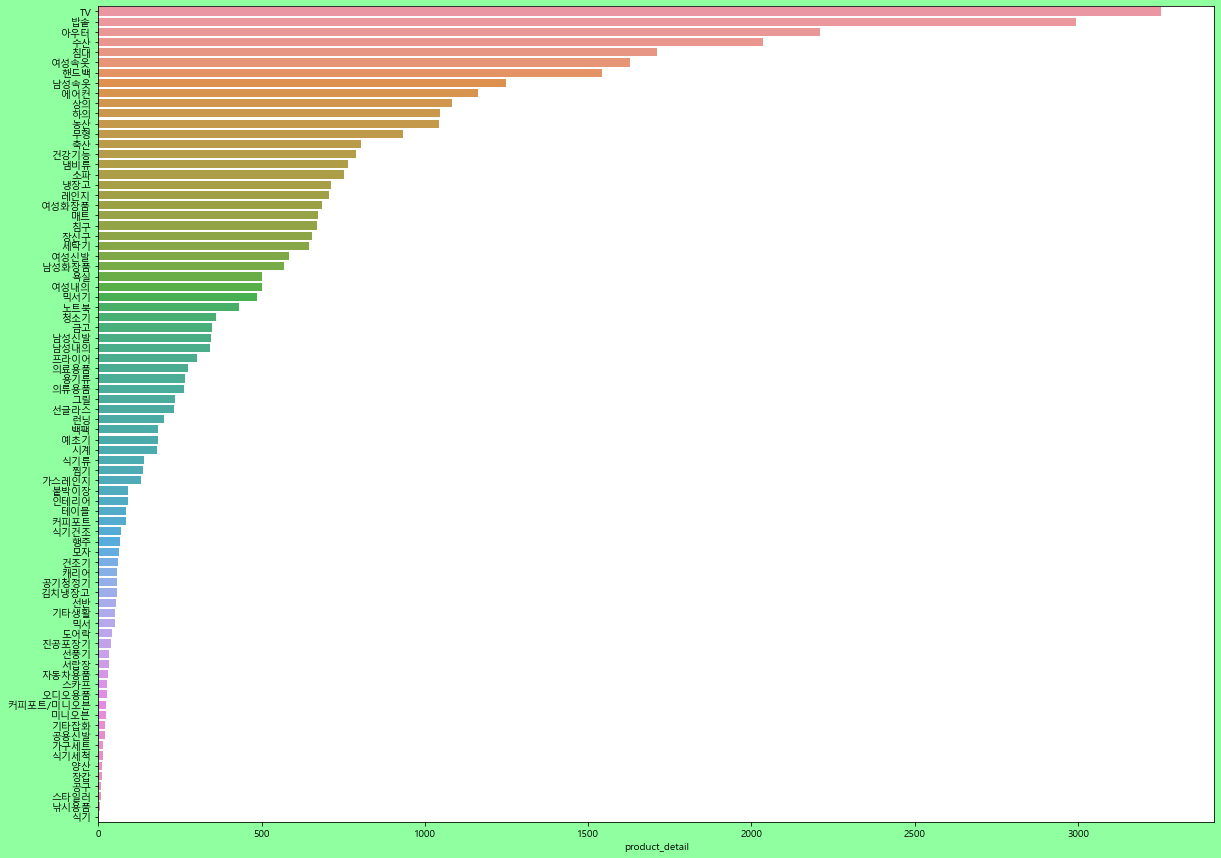

In [12]:
# 상품 소분류별 등장 빈도수
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor('xkcd:mint green')
sns.barplot(y=df['product_detail'].value_counts().index,x=df['product_detail'].value_counts())

In [20]:
col_list = ['group','hour', 'dow',
       'group_dow', 'early', 'month', 'season', 'day_night',
       'group_time1', 'group_time2', 'group_exposure', 'detail', 
       'test']

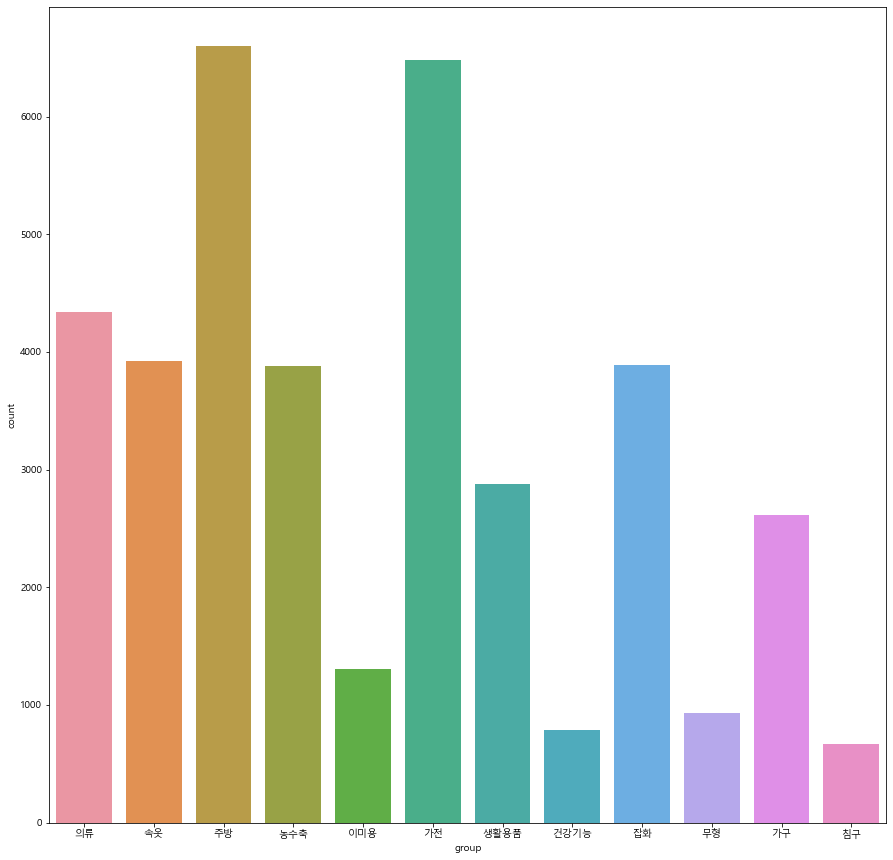

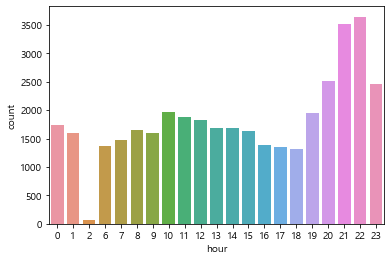

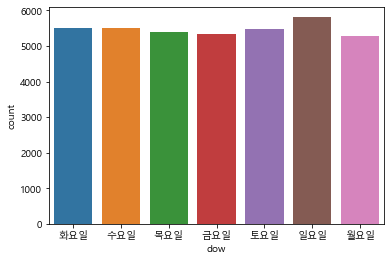

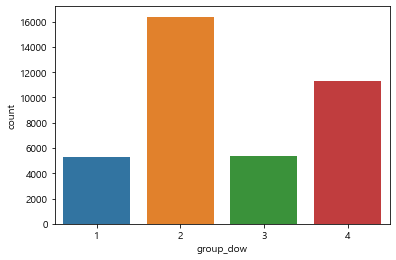

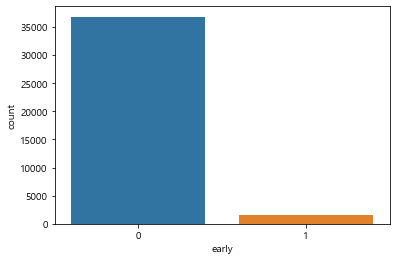

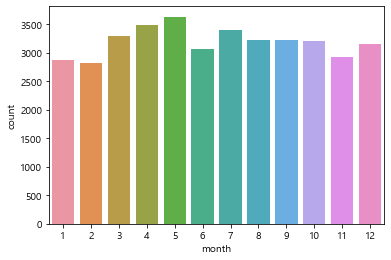

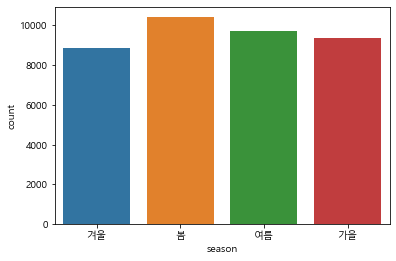

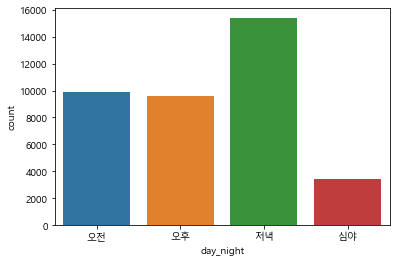

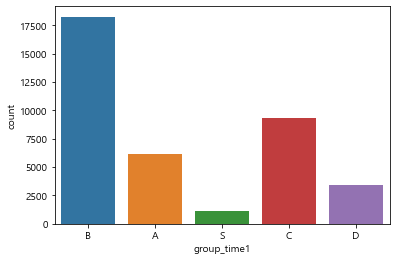

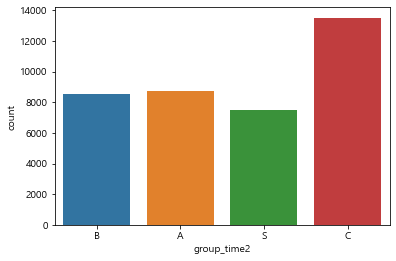

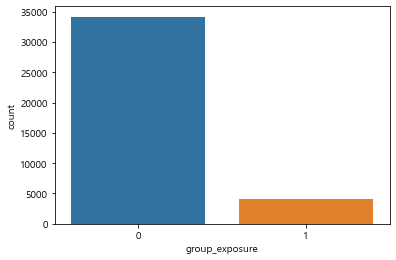

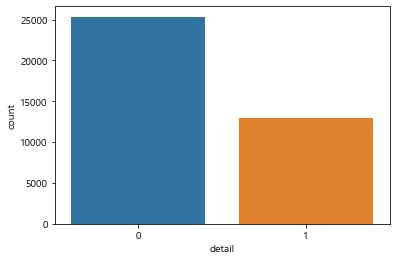

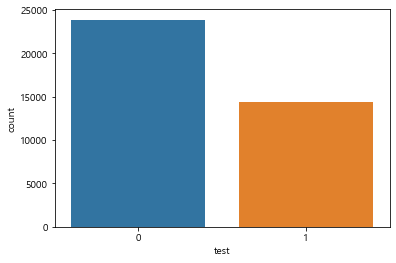

In [25]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.countplot(x=df[col],data=df)
    plt.show()

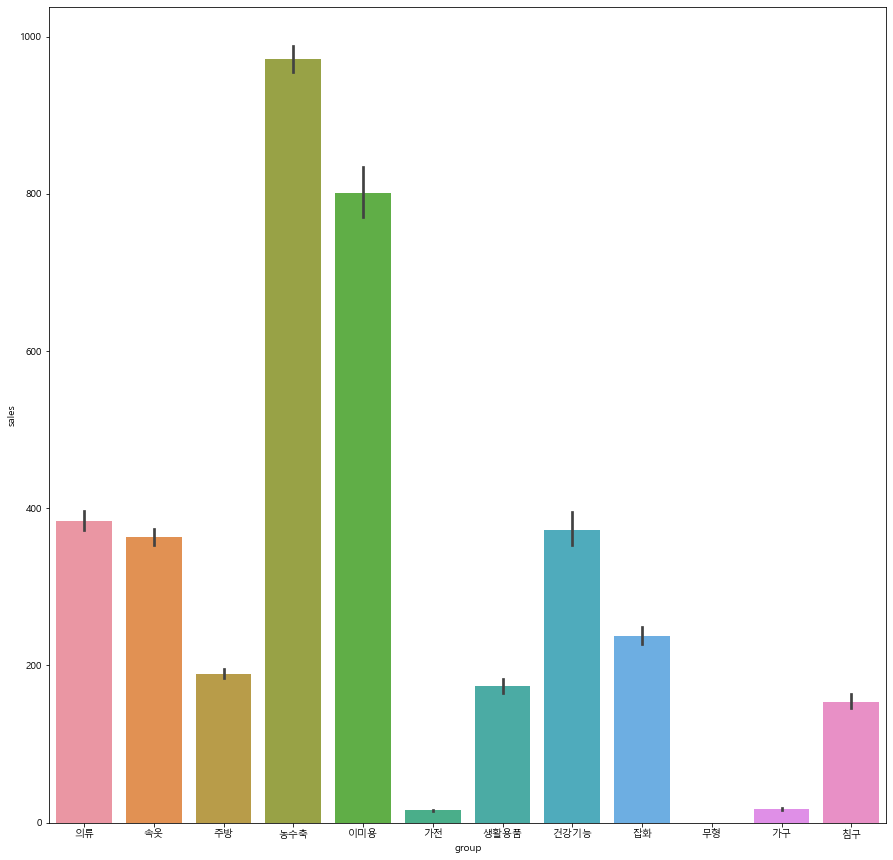

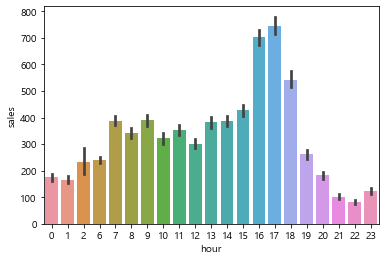

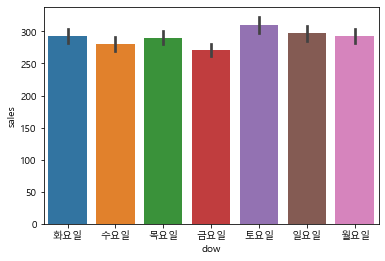

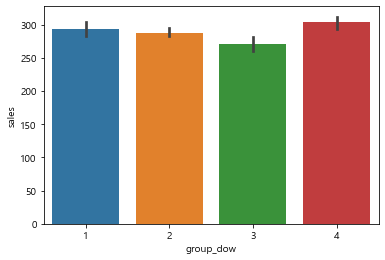

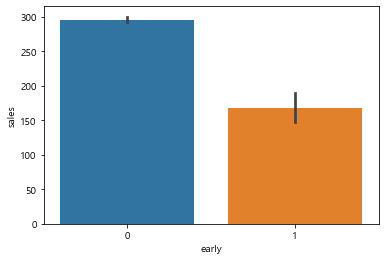

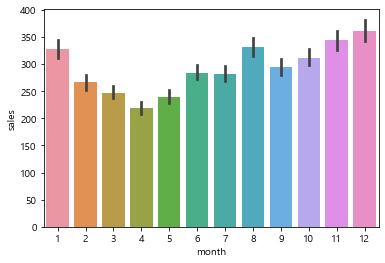

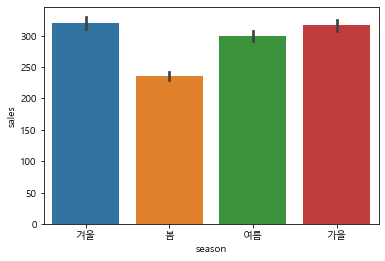

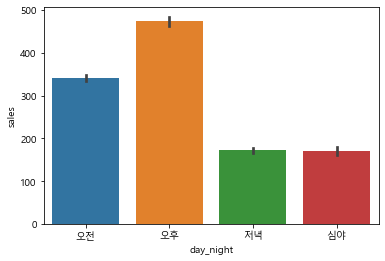

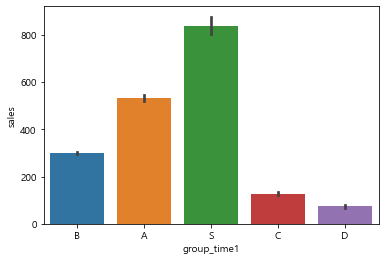

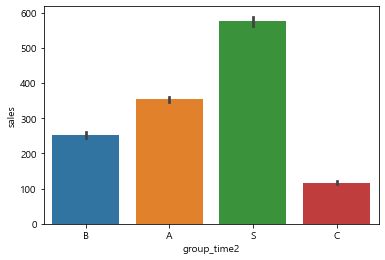

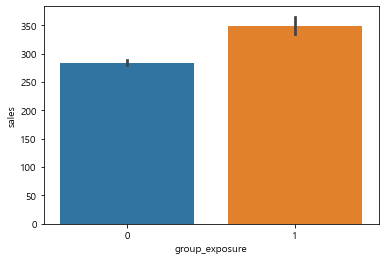

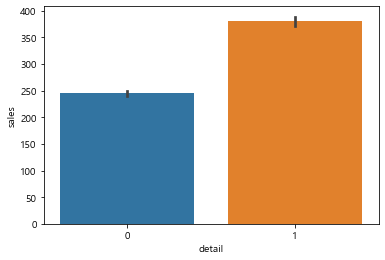

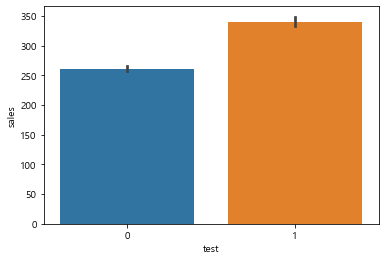

In [26]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col], data = df)
    plt.show()

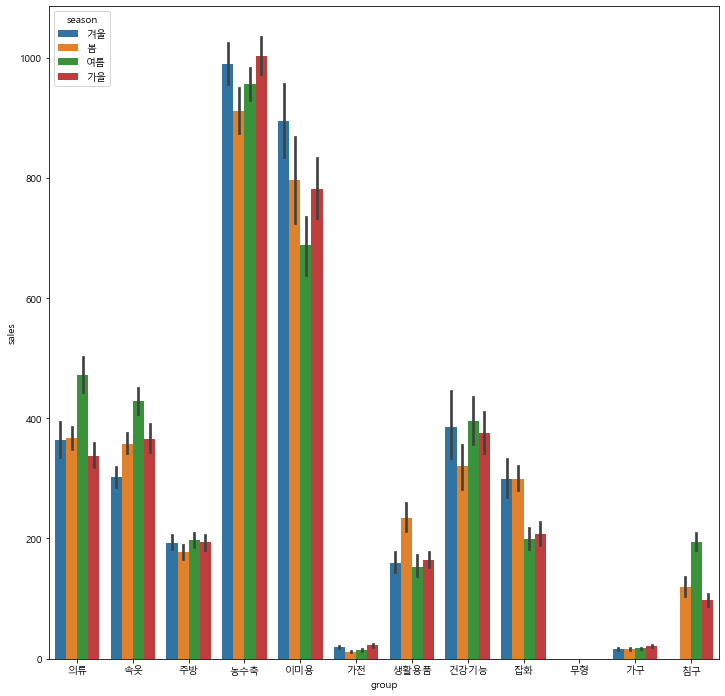

In [33]:
plt.figure(figsize = (12,12))
sns.barplot(y = 'sales', x = 'group', hue = 'season', data = df)

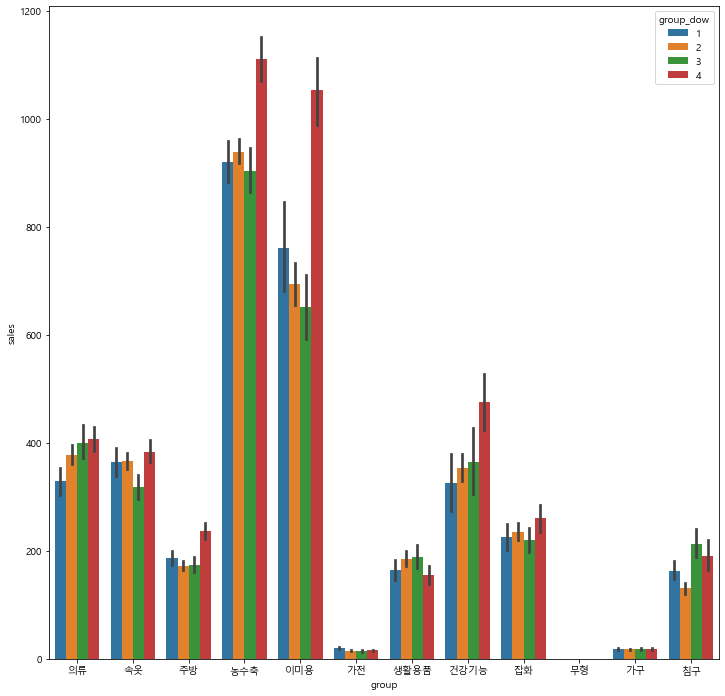

In [34]:
plt.figure(figsize = (12,12))
sns.barplot(y = 'sales', x = 'group', hue = 'group_dow', data = df)

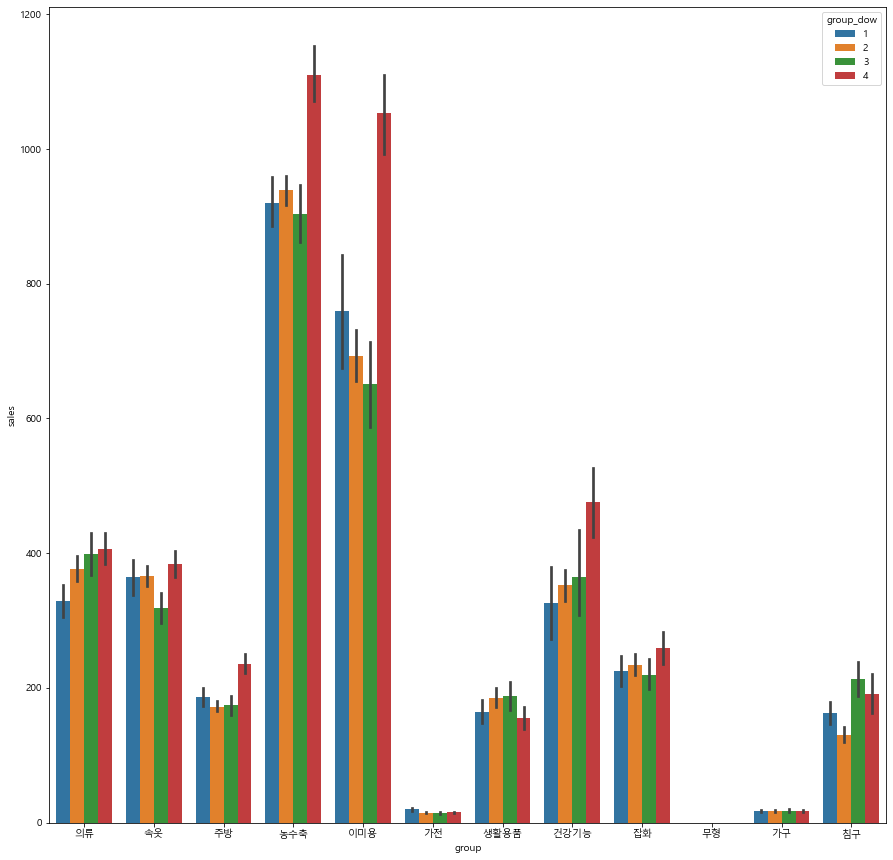

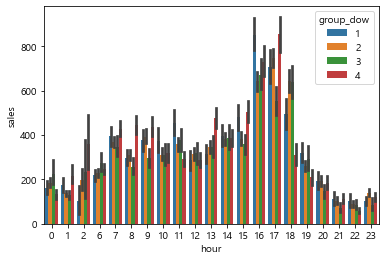

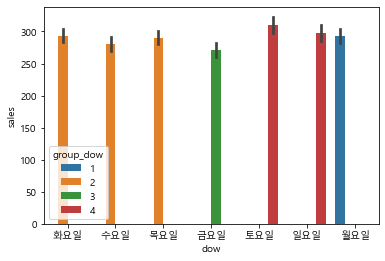

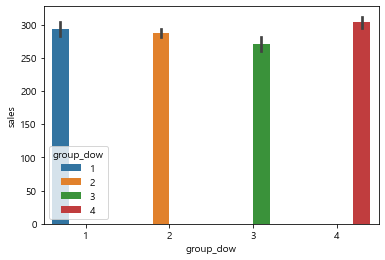

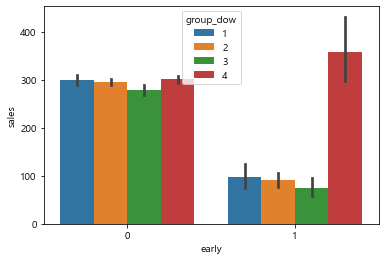

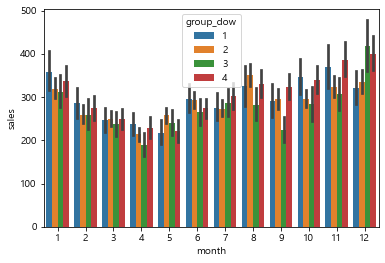

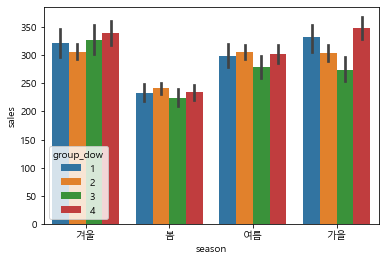

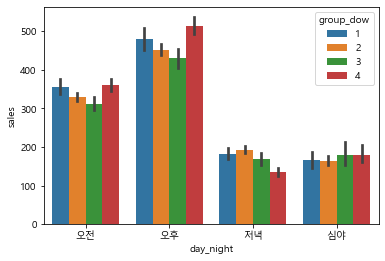

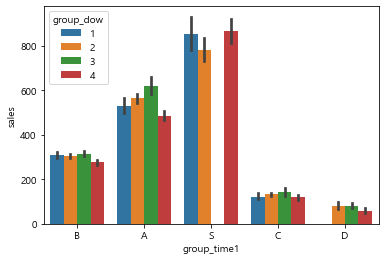

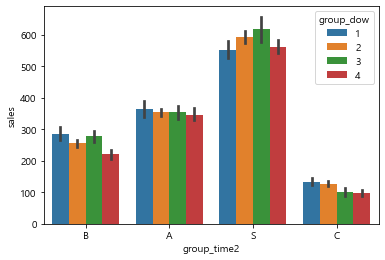

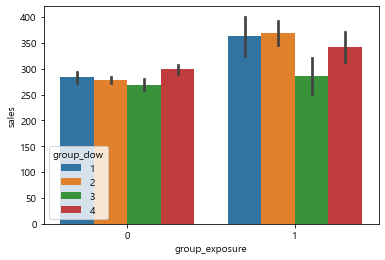

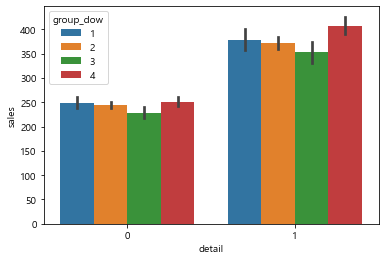

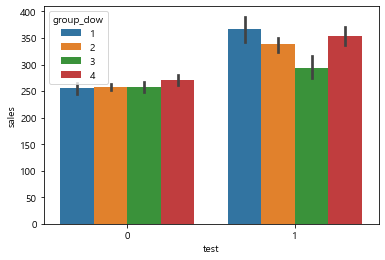

In [36]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col],hue ='group_dow' , data = df)
    plt.show()

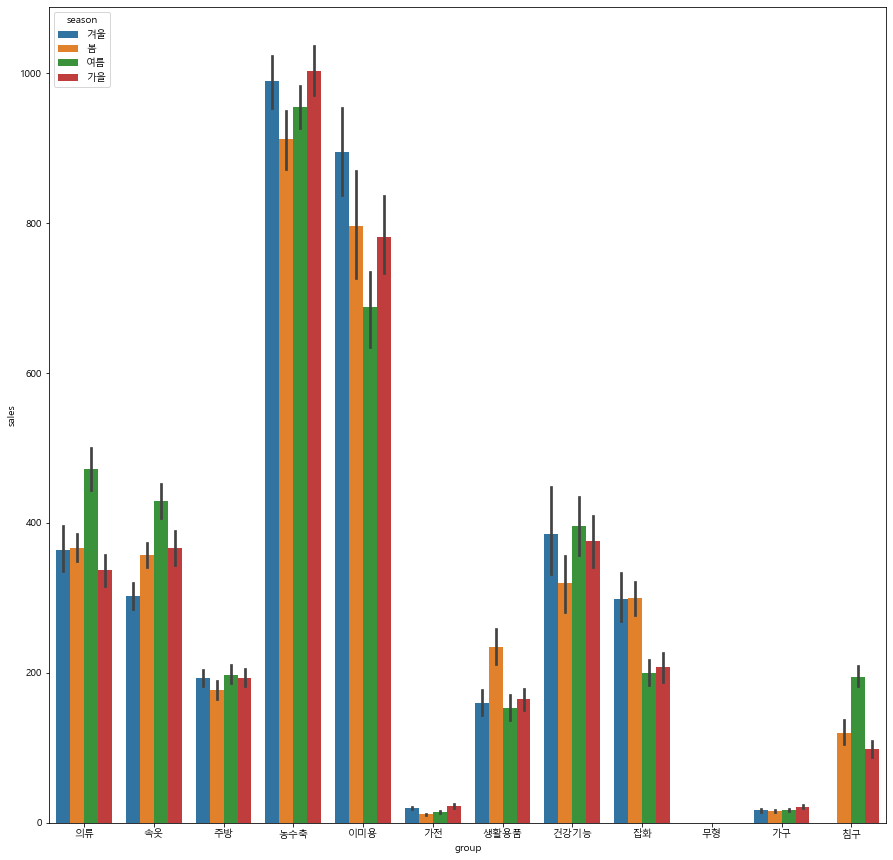

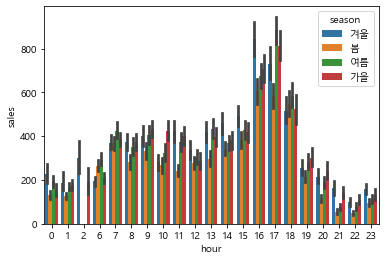

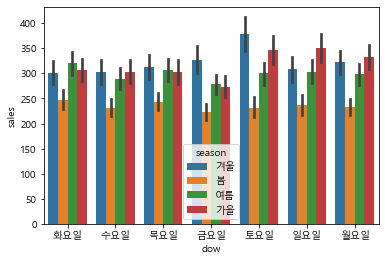

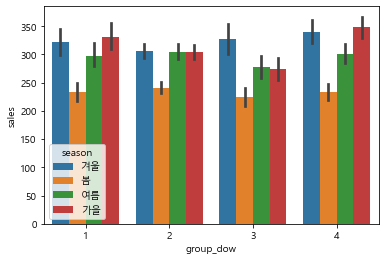

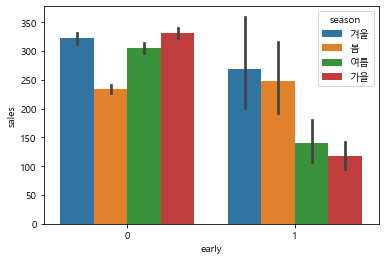

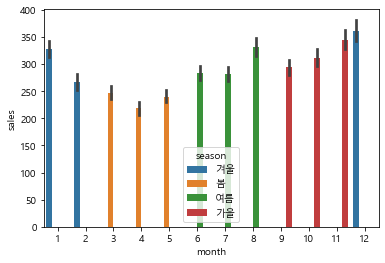

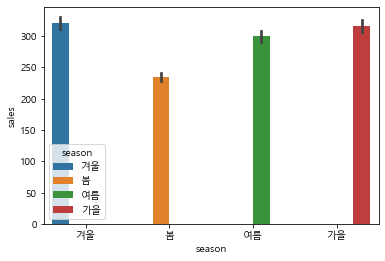

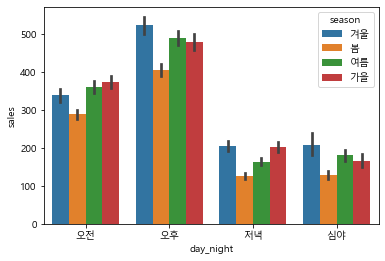

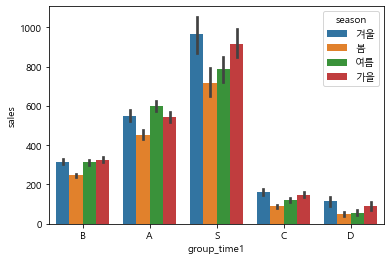

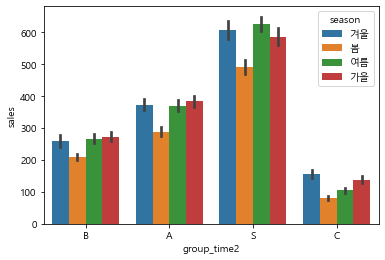

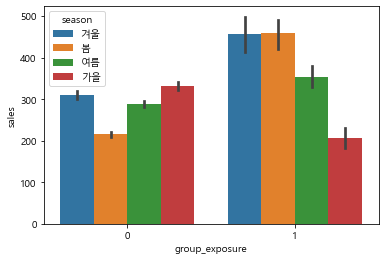

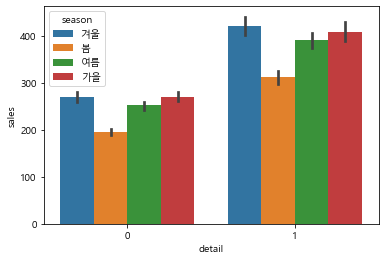

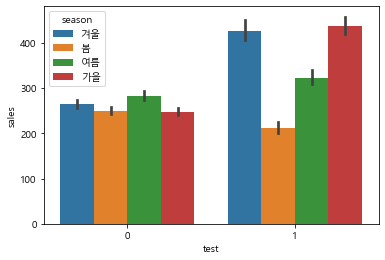

In [37]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col],hue ='season' , data = df)
    plt.show()

In [38]:
df.columns

Index(['exposure', 'mot_code', 'product_code', 'product_name', 'group',
       'product_detail', 'brand', 'price', 'tot_price', 'sales', 'hour', 'dow',
       'group_dow', 'ratings', 'early', 'month', 'season', 'day_night',
       'group_time1', 'group_time2', 'group_exposure', 'detail', 'temperature',
       'test'],
      dtype='object')

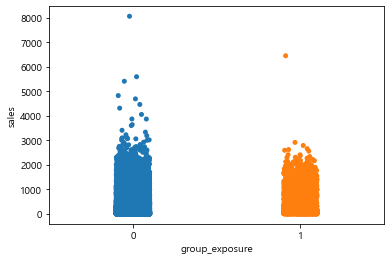

In [46]:
sns.stripplot(x="group_exposure", y="sales", data=df) ## 더 쪼개보자

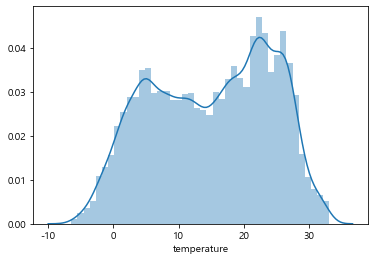

In [49]:
sns.distplot(df['temperature'])

In [9]:
df.head()

,exposure,mot_code,product_code,product_name,group,product_detail,brand,price,tot_price,sales,...,early,month,season,day_night,group_time1,group_time2,group_exposure,detail,temperature,test
0,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,2099000,52.606516,...,0,1,겨울,오전,B,B,0,0,-3.70,0
1,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,4371000,109.548872,...,0,1,겨울,오전,B,B,0,0,-3.70,0
2,20,100346,201079,테이트 여성 셀린니트3종,의류,상의,테이트,39900,6955000,174.310777,...,0,1,겨울,오전,B,B,0,0,-3.71,0
3,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,3262000,81.754386,...,0,1,겨울,오전,B,B,0,0,-3.71,0
4,20,100346,201072,테이트 남성 셀린니트3종,의류,상의,테이트,39900,6672000,167.218045,...,0,1,겨울,오전,B,B,0,1,-3.71,0


In [8]:
df['price'].describe()

count    3.830000e+04
mean     4.566440e+05
std      7.261159e+05
min      0.000000e+00
25%      5.900000e+04
50%      1.090000e+05
75%      4.990000e+05
max      7.930000e+06
Name: price, dtype: float64

In [17]:
conditionlist = [
    (df['price'] <= 59000) ,
    (df['price'] > 59000) & (df['price'] <=99000),
    (df['price'] > 99000) & (df['price'] <=399000),
    (df['price'] > 399000)]
choicelist = ['1','2','3','4']
df['price_range'] = np.select(conditionlist, choicelist, default='Not Specified')

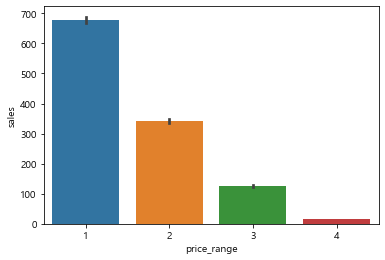

In [18]:
sns.barplot(x = 'price_range', y = 'sales', data = df)

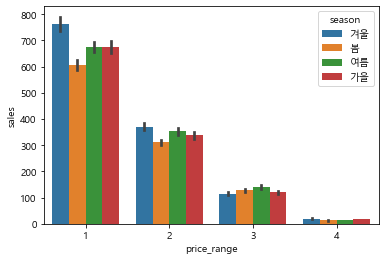

In [23]:
sns.barplot(x = 'price_range', y = 'sales', hue = 'season', data = df)

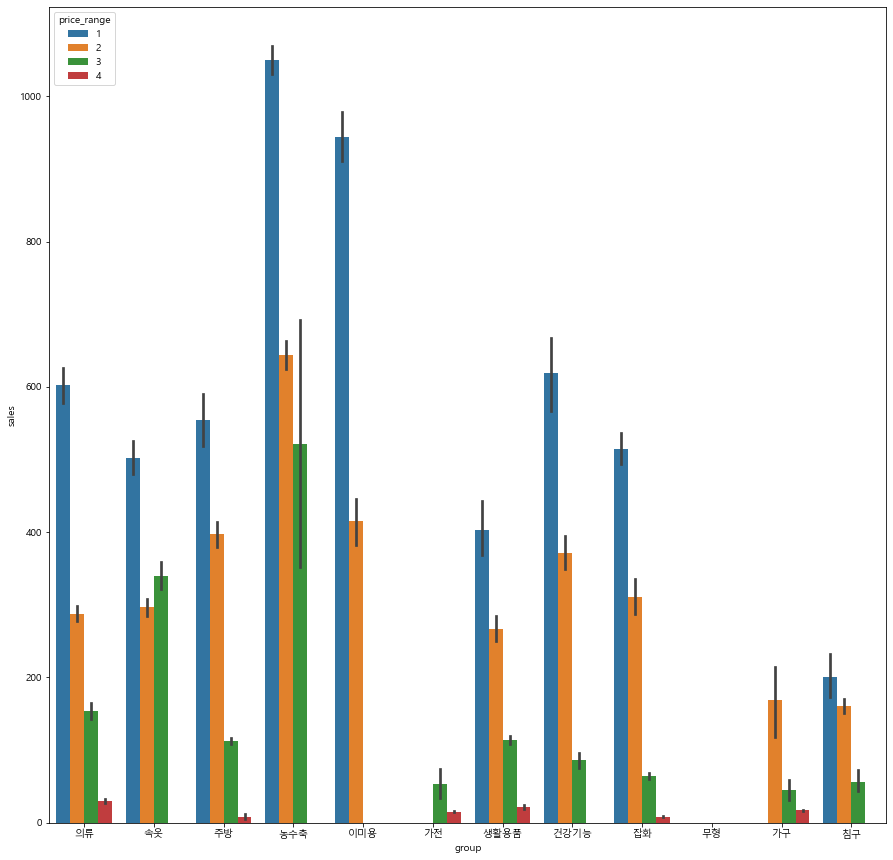

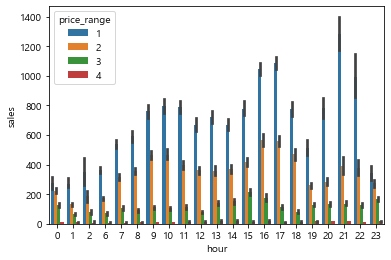

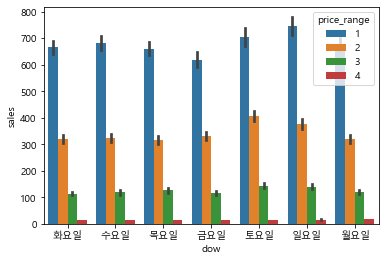

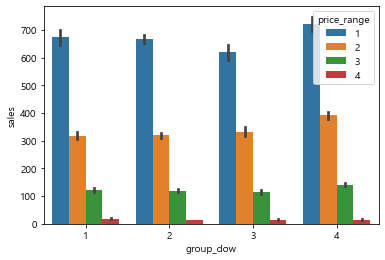

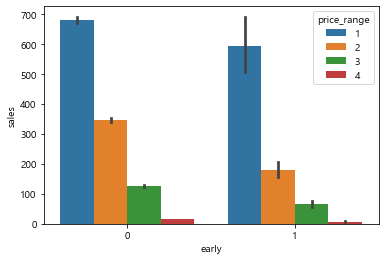

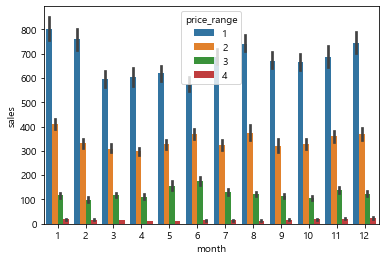

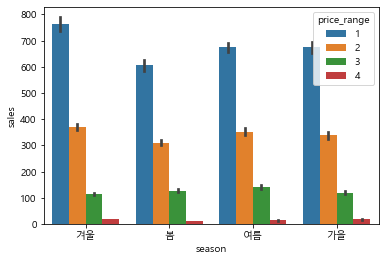

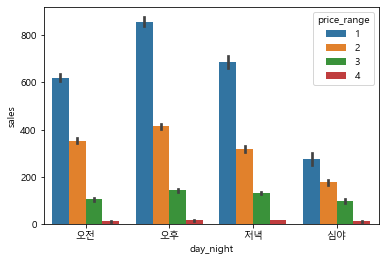

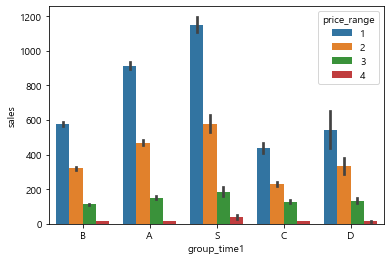

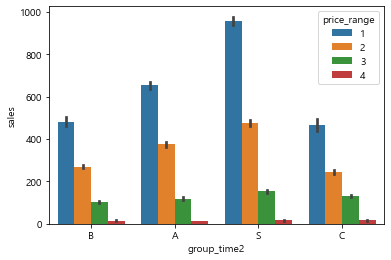

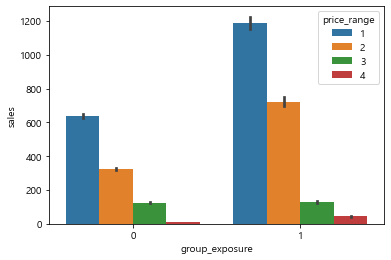

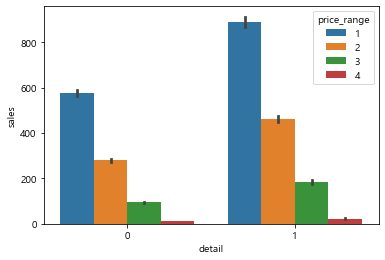

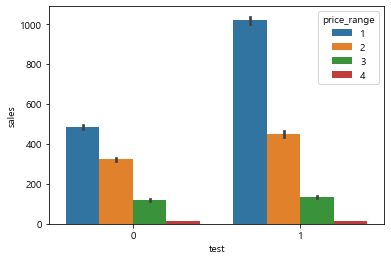

In [21]:
plt.figure(figsize = (15,15))
for col in col_list:
    sns.barplot(y = 'sales', x = df[col],hue ='price_range' , data = df)
    plt.show()